In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
#from xgboost import XGBRegresseor

In [2]:
#!pip install XGBRegresseor

In [3]:
data_train = pd.read_csv('train_v9rqX0R.csv')
data_test = pd.read_csv('test_AbJTz2l.csv')

In [4]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
data_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
# checking null values in train data

In [11]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# # item_weight has 1463 null values and outlet_size has 2410 null values

In [13]:
#Checking for null values in test data

In [14]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
# item_weight has 976 and outlet_size has 1606 null values

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [18]:
# checking number of rows and columns

In [19]:
data_train.shape

(8523, 12)

In [20]:
# 8523 rows and 12 columns in train dataset

In [21]:
data_test.shape

(5681, 11)

In [22]:
#  5681 rows and 11 columns

In [23]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


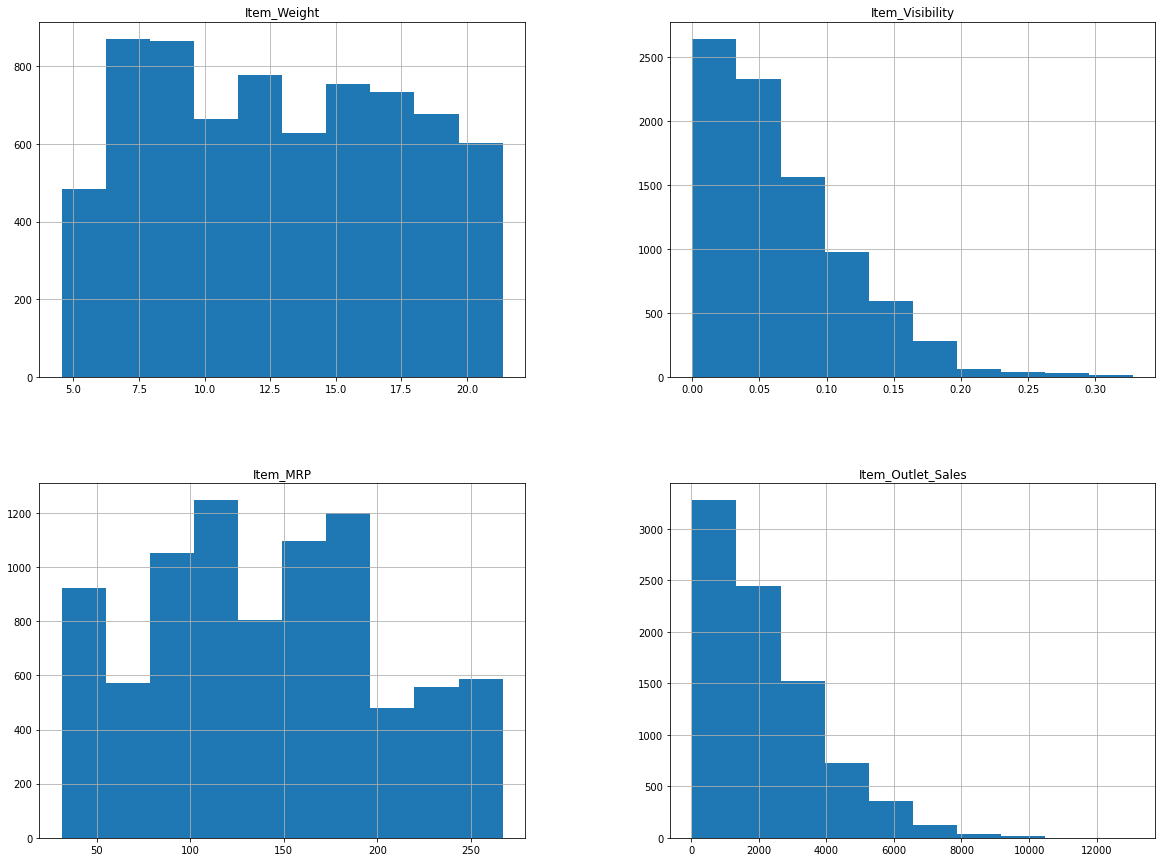

In [25]:
freqgraph = data_train.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

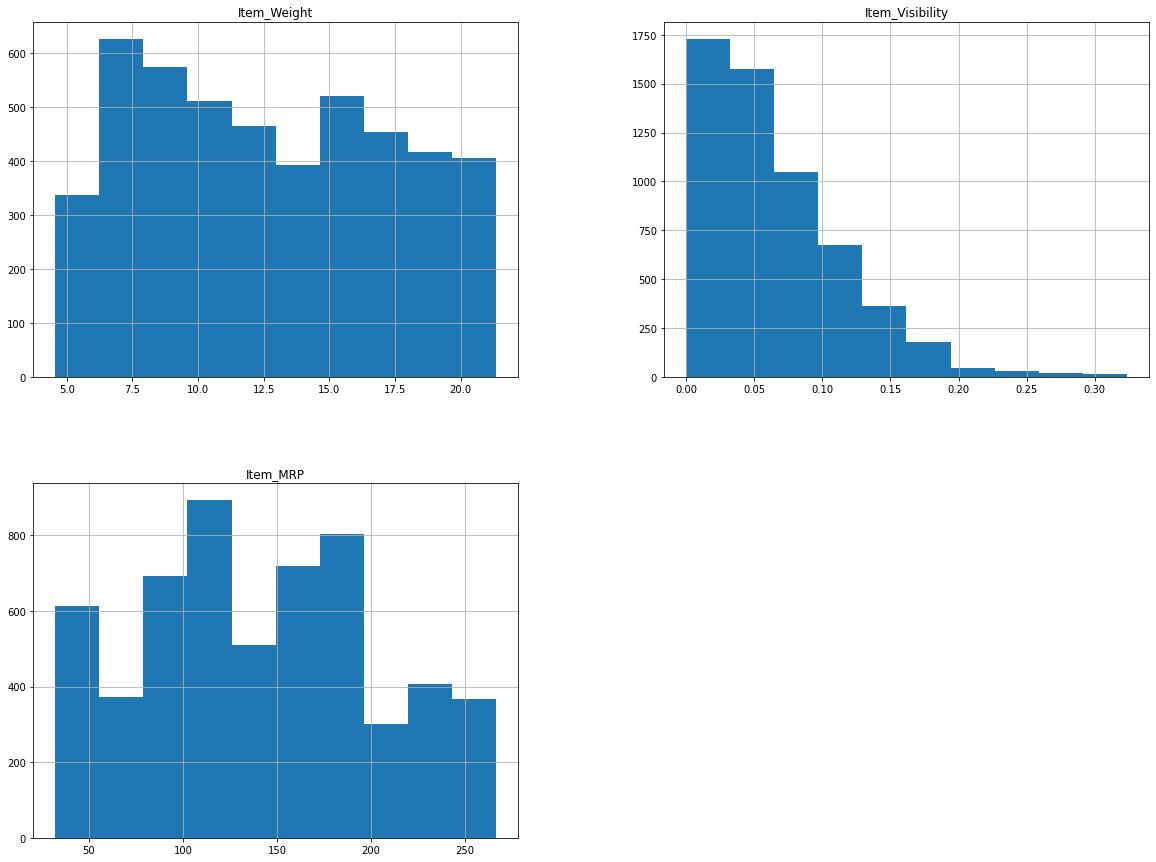

In [26]:
freqgraph = data_test.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Boxplot of Item Visibility  column')

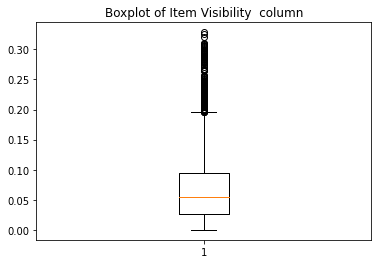

In [27]:
plt.boxplot(data_train['Item_Visibility'])
plt.title('Boxplot of Item Visibility  column')

Text(0.5, 1.0, 'Boxplot of Item MRP  column')

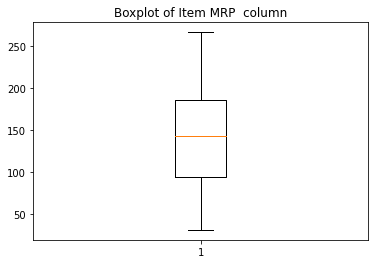

In [28]:
plt.boxplot(data_train['Item_MRP'])
plt.title('Boxplot of Item MRP  column')

Text(0.5, 1.0, 'Boxplot of Outlet_Establishment_Year  column')

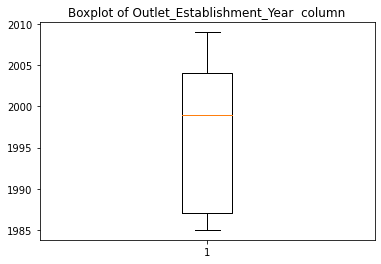

In [29]:
plt.boxplot(data_train['Outlet_Establishment_Year'])
plt.title('Boxplot of Outlet_Establishment_Year  column')

Text(0.5, 1.0, 'Boxplot of Item_Outlet_Sales  column')

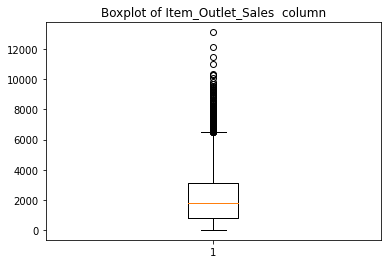

In [30]:
plt.boxplot(data_train['Item_Outlet_Sales'])
plt.title('Boxplot of Item_Outlet_Sales  column')

In [31]:
# test data outliers 

Text(0.5, 1.0, 'Boxplot of Item_Weight  column')

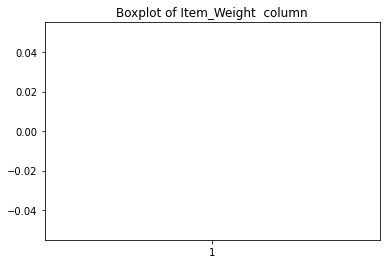

In [32]:
plt.boxplot(data_test['Item_Weight'])
plt.title('Boxplot of Item_Weight  column')

Text(0.5, 1.0, 'Boxplot of Item_Visibility  column')

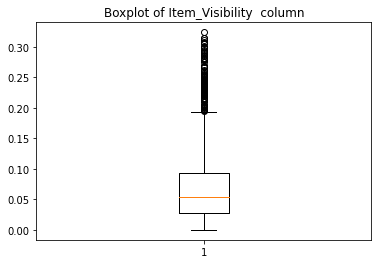

In [33]:
plt.boxplot(data_test['Item_Visibility'])
plt.title('Boxplot of Item_Visibility  column')

Text(0.5, 1.0, 'Boxplot of Item_MRP  column')

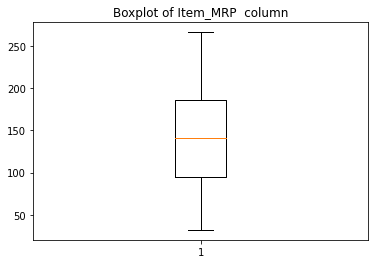

In [34]:
plt.boxplot(data_test['Item_MRP'])
plt.title('Boxplot of Item_MRP  column')

Text(0.5, 1.0, 'Boxplot of Outlet_Establishment_Year  column')

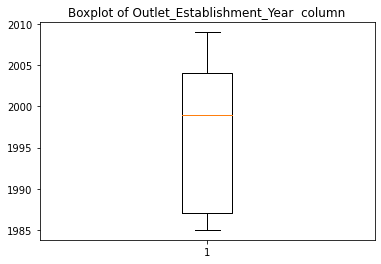

In [35]:
plt.boxplot(data_test['Outlet_Establishment_Year'])
plt.title('Boxplot of Outlet_Establishment_Year  column')

In [36]:
# missing value handling in train dataset and test data set

In [37]:
data_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [38]:
data_test['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [39]:
# item_weight is numerical so we use median

In [40]:
data_train['Item_Weight'] = data_train['Item_Weight'].fillna(data_train['Item_Weight'].median())
data_test['Item_Weight'] = data_test['Item_Weight'].fillna(data_test['Item_Weight'].median())

In [41]:
data_train['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [42]:
data_test['Item_Weight'].describe()

count    5681.000000
mean       12.662023
std         4.245831
min         4.555000
25%         9.195000
50%        12.500000
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [43]:
# outlet_size is categorical so we use mode to fill

In [44]:
data_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [45]:
data_train['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [46]:
#mode_of_outlet_size = data_train.pivot_table(values ='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [47]:
#print(mode_of_outlet_size)

In [48]:
#missing_values = data_train['Outlet_Size'].isnull()

In [49]:
#print(missing_values)

In [50]:
#data_train.loc[missing_values,'Outlet_Size'] = data_train.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [51]:
#missing_values = data_train['Outlet_Size'].isnull().sum()

In [52]:
#print(missing_values)

In [53]:
#missing_values = data_train['Outlet_Size'].isnull().sum()

In [54]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [55]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [56]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [57]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [58]:
data_test['Outlet_Size'].describe()

count       4075
unique         3
top       Medium
freq        1862
Name: Outlet_Size, dtype: object

In [59]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.662023,0.065684,141.023273,1997.828903
std,4.245831,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [60]:
data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0],inplace= True)
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0],inplace=True)

In [61]:
#data_test['Outlet_Size']

In [62]:
#data_test['Outlet_Size'].describe()

In [63]:
#data_test['Outlet_Size'].describe()

In [64]:
#data_test.isnull().sum()

In [65]:
#data_train.describe()

In [66]:
#mode_of_outlet_size1 = data_test.pivot_table(values ='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [67]:
#print(mode_of_outlet_size1)

In [68]:
#missing_values1 = data_test['Outlet_Size'].isnull()

In [69]:
#print(missing_values1)

In [70]:
#data_test.loc[missing_values1,'Outlet_Size'] = data_test.loc[missing_values1,'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [71]:
#missing_values1 = data_test['Outlet_Size'].isnull().sum()

In [72]:
#print(missing_values1)

In [73]:
#type(data_test["Outlet_Size"])

In [74]:
data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [75]:
data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [76]:
# Null values are handled

In [77]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [78]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.662023,0.065684,141.023273,1997.828903
std,4.245831,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [79]:
# selecting features 

In [80]:
data_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
data_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [81]:
data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [82]:
data_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.500,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [83]:
# Exploratory data analysis

<AxesSubplot: >

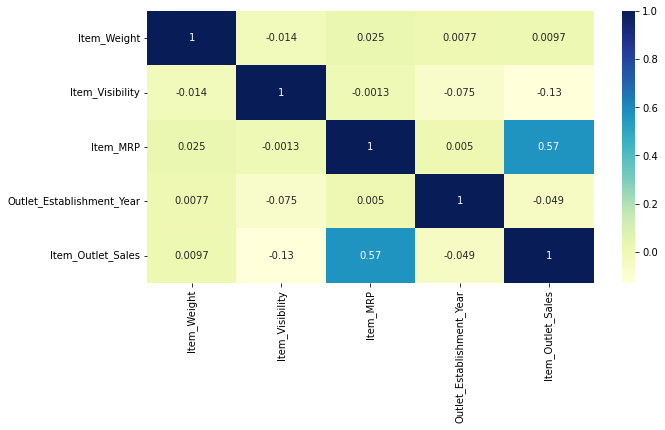

In [84]:
corrmatrix = data_train.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

In [85]:
# Item_Outlet_Sales and Item MRP are highly correlated

<AxesSubplot: >

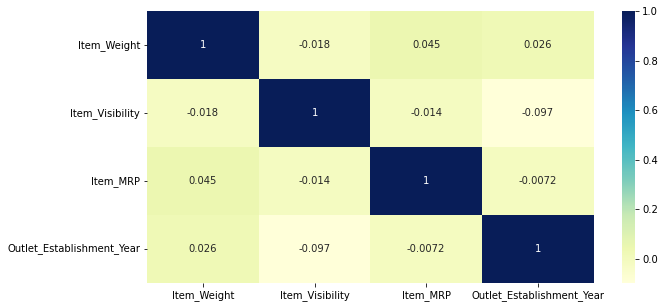

In [86]:
corrmatrix = data_test.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

In [87]:
# there is no correlation between any of the faetures

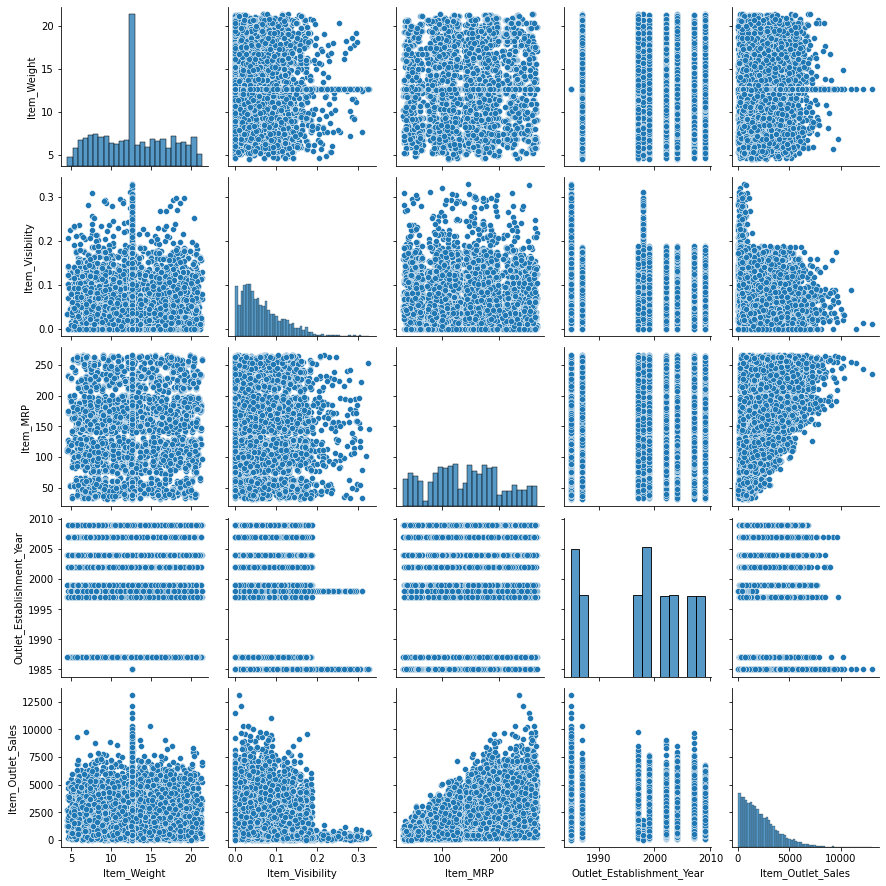

In [88]:
sns.pairplot(data_train)
plt.show()

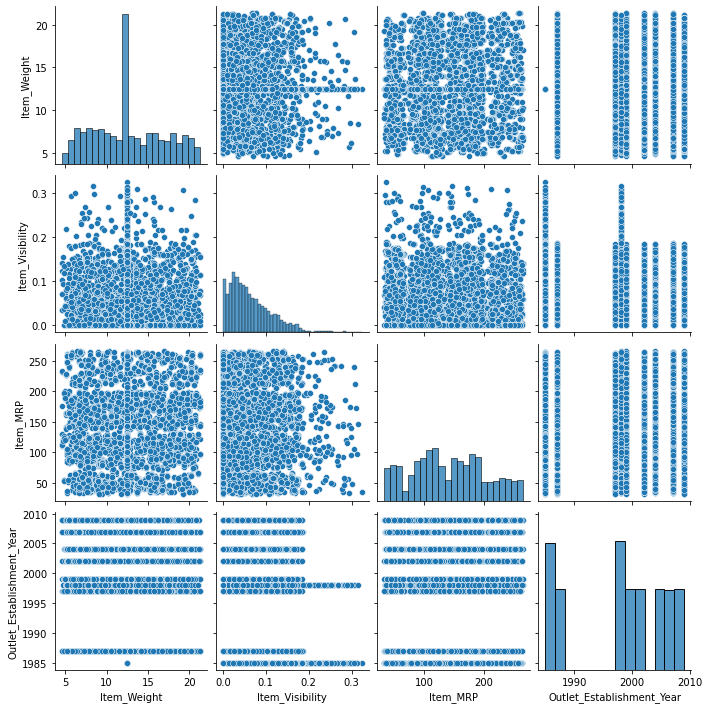

In [89]:
sns.pairplot(data_test)
plt.show()

<AxesSubplot: xlabel='Item_Weight', ylabel='Count'>

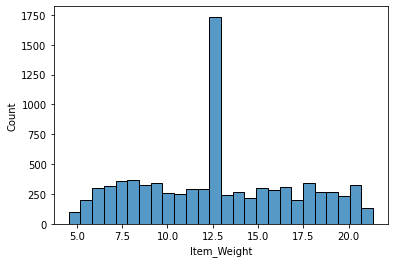

In [90]:
sns.histplot(x=data_train['Item_Weight'])

<AxesSubplot: xlabel='Item_Visibility', ylabel='Count'>

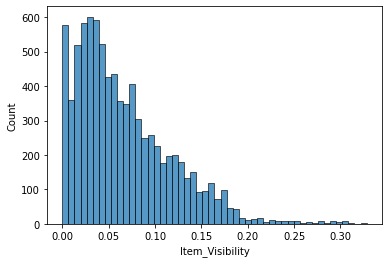

In [91]:
sns.histplot(x=data_train['Item_Visibility'])

<AxesSubplot: xlabel='Item_MRP', ylabel='Count'>

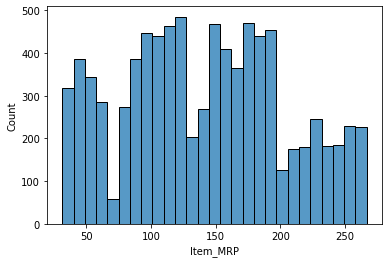

In [92]:
sns.histplot(x=data_train['Item_MRP'])

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

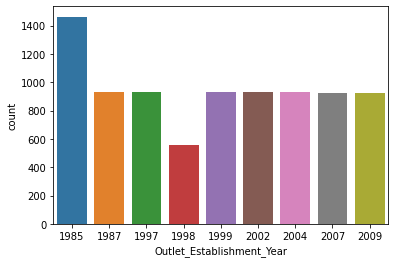

In [93]:
sns.countplot(x=data_train['Outlet_Establishment_Year'])

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

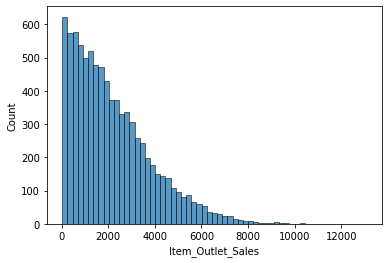

In [94]:
sns.histplot(x=data_train['Item_Outlet_Sales'])

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

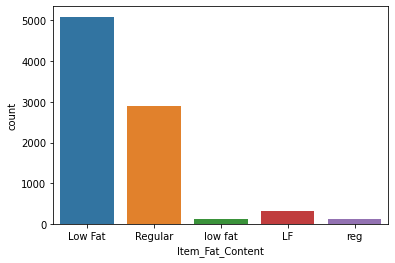

In [95]:
sns.countplot(x=data_train['Item_Fat_Content'])

<AxesSubplot: xlabel='Item_Type', ylabel='count'>

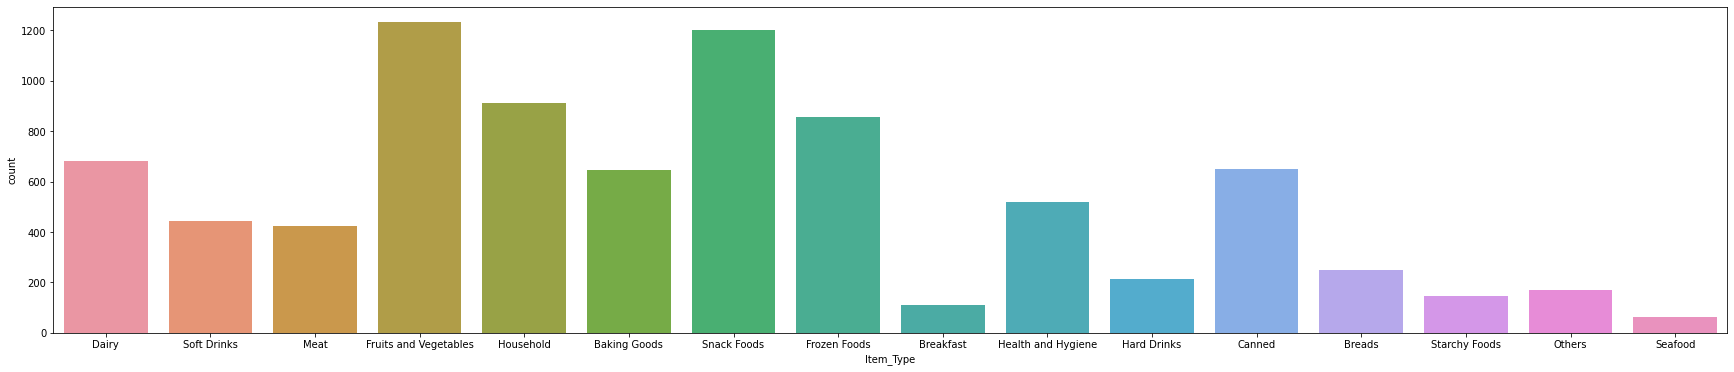

In [96]:
plt.figure(figsize=(30,6))
sns.countplot(x=data_train['Item_Type'])


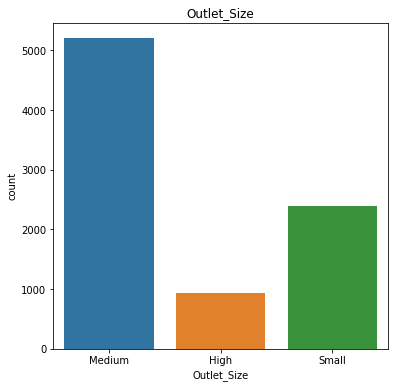

In [97]:
plt.figure(figsize=(6,6))
sns.countplot(x=data_train['Outlet_Size'])
plt.title('Outlet_Size')
plt.show()

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

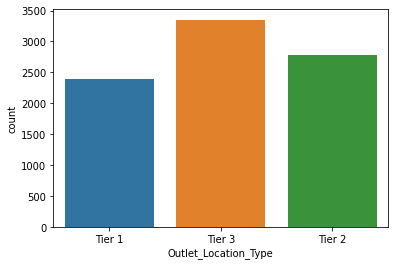

In [98]:
sns.countplot(x=data_train['Outlet_Location_Type'])

<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

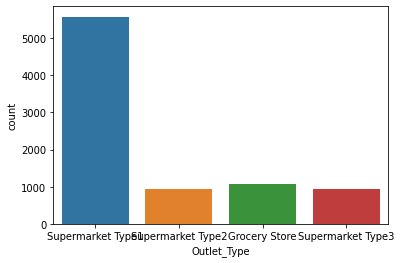

In [99]:
sns.countplot(x=data_train['Outlet_Type'])

In [100]:
# test data EDA

<AxesSubplot: xlabel='Item_Weight', ylabel='Count'>

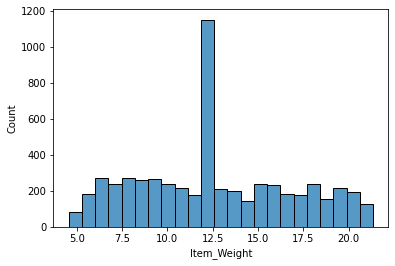

In [101]:
sns.histplot(x=data_test['Item_Weight'])

<AxesSubplot: xlabel='Item_Visibility', ylabel='Count'>

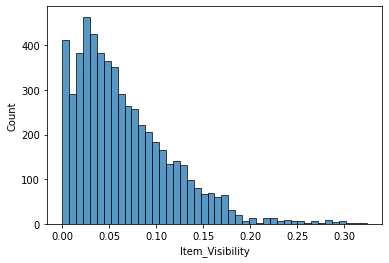

In [102]:
sns.histplot(x=data_test['Item_Visibility'])

<AxesSubplot: xlabel='Item_MRP', ylabel='Count'>

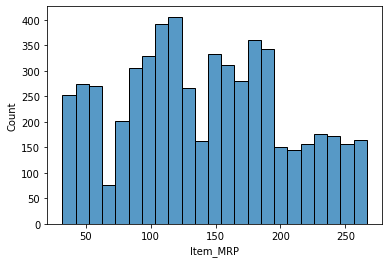

In [103]:
sns.histplot(x=data_test['Item_MRP'])

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='Count'>

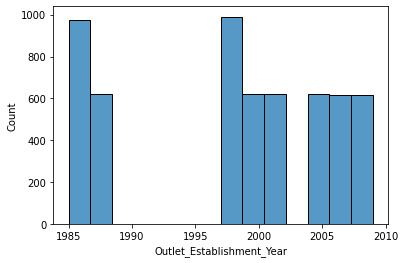

In [104]:
sns.histplot(x=data_test['Outlet_Establishment_Year'])

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

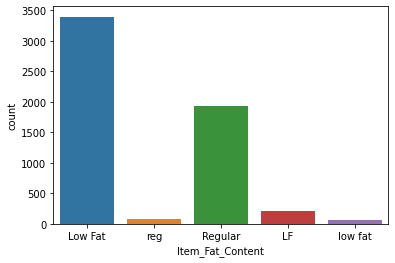

In [105]:
sns.countplot(x=data_test['Item_Fat_Content'])

<AxesSubplot: xlabel='Item_Type', ylabel='count'>

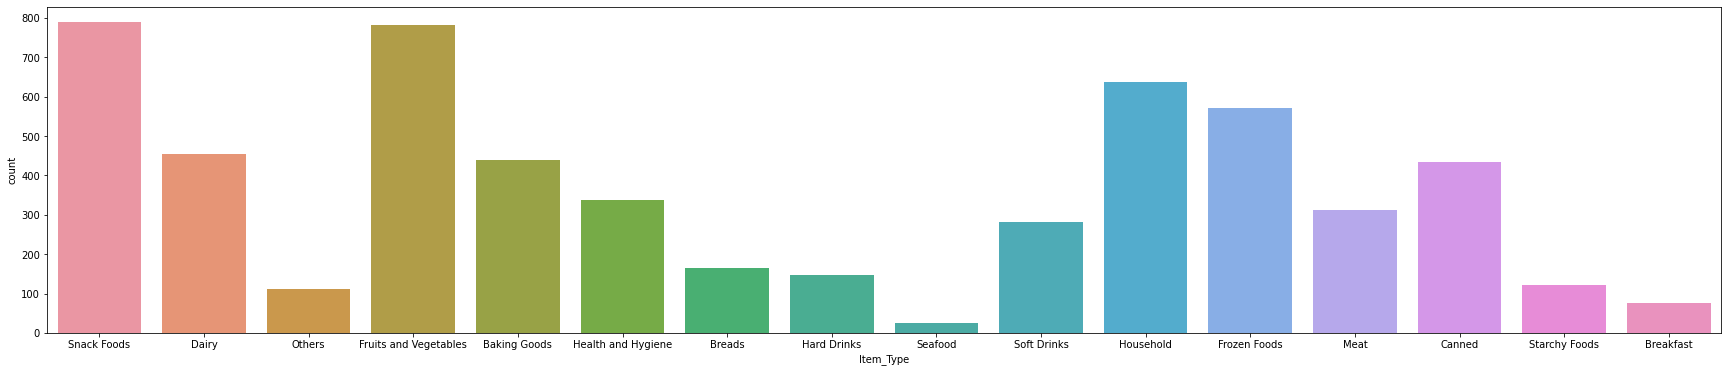

In [106]:
plt.figure(figsize=(30,6))
sns.countplot(x=data_test['Item_Type'])


<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

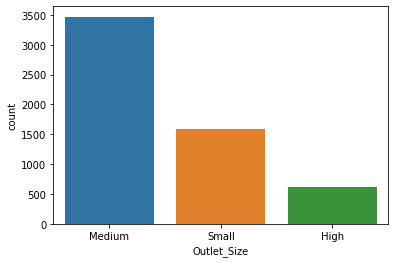

In [107]:
sns.countplot(x=data_test['Outlet_Size'])

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

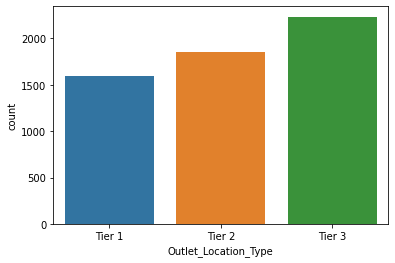

In [108]:
sns.countplot(x=data_test['Outlet_Location_Type'])

<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

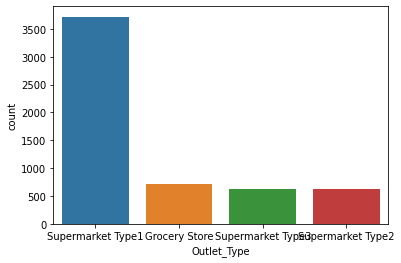

In [109]:
sns.countplot(x=data_test['Outlet_Type'])

In [110]:
# encoding the train data

In [111]:
# 1. checking for unique values for train data

In [112]:
data_train['Item_Fat_Content'].nunique()

5

In [113]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [114]:
data_train.replace({'Item_Fat_Content' : {'low fat':'Low fat','LF': 'Low Fat','reg':'Regular'}},inplace=True)

In [115]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
Low fat     112
Name: Item_Fat_Content, dtype: int64

In [116]:
data_train['Item_Type'].nunique()

16

In [117]:
data_train['Outlet_Size'].nunique()

3

In [118]:
data_train['Outlet_Size'].value_counts() #label

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [119]:
data_train['Outlet_Location_Type'].nunique() # label

3

In [120]:
data_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [121]:
data_train['Outlet_Type'].nunique()

4

In [122]:
data_train['Outlet_Type'].value_counts() #label

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [123]:
#  checking for unique values on  test data

In [124]:
data_test['Item_Fat_Content'].nunique()

5

In [125]:
data_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [126]:
data_test.replace({'Item_Fat_Content' : {'low fat':'Low fat','LF': 'Low Fat','reg':'Regular'}},inplace=True)

In [127]:
data_test['Item_Fat_Content'].value_counts()

Low Fat    3602
Regular    2013
Low fat      66
Name: Item_Fat_Content, dtype: int64

In [128]:
data_test['Item_Type'].nunique()

16

In [129]:
data_test['Outlet_Size'].nunique()

3

In [130]:
data_test['Outlet_Size'].value_counts() #label

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [131]:
data_test['Outlet_Location_Type'].nunique() # label

3

In [132]:
data_test['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [133]:
data_test['Outlet_Type'].nunique()

4

In [134]:
data_test['Outlet_Type'].value_counts() #label

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [135]:
# Importing the Label Encoder

In [136]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [137]:
# Label encoding all the categorical values in train data

In [138]:
data_train['Item_Fat_Content'] = label_enc.fit_transform(data_train['Item_Fat_Content'])

In [139]:
data_train['Item_Fat_Content']

0       0
1       2
2       0
3       2
4       0
       ..
8518    0
8519    2
8520    0
8521    2
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int32

In [140]:
data_train['Item_Type'] =label_enc.fit_transform(data_train['Item_Type'])

In [141]:
data_train['Outlet_Size'] = label_enc.fit_transform(data_train['Outlet_Size'])

In [142]:
data_train['Outlet_Location_Type'] = label_enc.fit_transform(data_train['Outlet_Location_Type'])

In [143]:
data_train['Outlet_Type'] =label_enc.fit_transform(data_train['Outlet_Type'])

In [144]:
# label encoding for test data

In [145]:
data_test['Item_Type'] =label_enc.fit_transform(data_test['Item_Type'])                                    

In [146]:
data_test['Outlet_Location_Type'] = label_enc.fit_transform(data_test['Outlet_Location_Type'])

In [147]:
data_test['Outlet_Type'] =label_enc.fit_transform(data_test['Outlet_Type'])

In [148]:
data_test['Outlet_Size'] = label_enc.fit_transform(data_test['Outlet_Size'])

In [149]:
data_test['Item_Fat_Content'] = label_enc.fit_transform(data_test['Item_Fat_Content'])

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
# Splitting the target and feature 

In [152]:
X1= data_train['Item_Outlet_Sales']
X2 = data_train.drop('Item_Outlet_Sales',axis=1)

In [153]:
#standarization for train data

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()

In [156]:
scaled_data = scaler.fit_transform(X2)

In [157]:
scaled_data

array([[-0.83118663, -0.75420234, -0.97073217, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.63080955,  1.3451009 , -0.90811123, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 1.10872696, -0.75420234, -0.95691733, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [-0.52363935, -0.75420234, -0.59978449, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-1.32562802,  1.3451009 ,  1.53287976, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 0.46997492, -0.75420234, -0.41193591, ...,  1.38127431,
        -1.36933384, -0.25265831]])

In [158]:
X2 = pd.DataFrame(scaled_data,columns =['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
      'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'])

In [159]:
data_train = pd.concat([X1,X2],axis=1)

In [ ]:
# standardization of test data

In [161]:
scaled_data_test = scaler.fit_transform(data_test)

In [162]:
scaled_data_test

array([[ 1.90508981, -0.75501375, -1.13407715, ..., -0.28473712,
        -1.369215  , -0.25276858],
       [-1.02745678,  1.34138563, -0.53185019, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [ 0.45648246, -0.75501375,  0.6613164 , ..., -0.28473712,
         1.0915602 , -1.50799439],
       ...,
       [-0.62702873, -0.75501375,  0.15307374, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [ 0.6213646 ,  1.34138563, -1.28168987, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [-0.74480168,  1.34138563,  0.76171558, ..., -0.28473712,
        -0.1388274 , -0.25276858]])

In [163]:
data_test = pd.DataFrame(scaled_data_test,columns =['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
      'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'])

In [164]:
data_test.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03
mean,8.123917e-17,-1.222594e-16,-1.075046e-16,1.339850e-16,4.661920e-16,-1.284240e-14,2.894866e-16,-2.741455e-16,-7.164173e-16
std,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00
min,-1.909576e+00,-7.550138e-01,-1.281690e+00,-1.714612e+00,-1.764188e+00,-1.532446e+00,-1.950640e+00,-1.369215e+00,-1.507994e+00
25%,-8.166432e-01,-7.550138e-01,-7.539239e-01,-7.664496e-01,-7.541832e-01,-1.293541e+00,-2.847371e-01,-1.369215e+00,-2.527686e-01
50%,-3.816395e-02,-7.550138e-01,-2.249774e-01,-2.923682e-01,6.344716e-03,1.398906e-01,-2.847371e-01,-1.388274e-01,-2.527686e-01
75%,7.509148e-01,1.341386e+00,5.420473e-01,6.557944e-01,7.281662e-01,7.371538e-01,1.381166e+00,1.091560e+00,-2.527686e-01
max,2.046417e+00,1.341386e+00,5.033447e+00,1.840998e+00,2.031678e+00,1.334417e+00,1.381166e+00,1.091560e+00,2.257683e+00


In [165]:
# splitting data

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
# spliting target and feature

In [168]:
y= data_train['Item_Outlet_Sales']
X = data_train.drop('Item_Outlet_Sales',axis=1)

In [169]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42)

# model building

In [170]:
#  1. linear regression model 1

In [171]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model1 = lr.fit(X_train,y_train)
predictions1 = model1.predict(X_test)

In [172]:
predictions1

array([1093.57300346,  608.10584207, 1052.27308511, ...,  550.2731945 ,
       1172.26865919, 1603.30344263])

In [173]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
7205    3004.0896
3257     890.8404
6346     629.1810
6318     253.0040
6339     976.7286
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [174]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
print("Mean Squared Error  =",mean_squared_error(y_test,predictions1))
print('R Squared Value =',r2_score(y_test,predictions1))

Mean Squared Error  = 1293214.790384152
R Squared Value = 0.524198295533872


In [175]:
# Standard scaling linear regression model 2

In [176]:
y= data_train['Item_Outlet_Sales']
X = data_train.drop('Item_Outlet_Sales',axis=1)

In [177]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42)

In [178]:
lr = linear_model.LinearRegression()
model2 = lr.fit(X_train,y_train)
predictions2 = model2.predict(X_test)

In [179]:
print("Mean Squared Error  =",mean_squared_error(y_test,predictions2))
print('R Squared Value =',r2_score(y_test,predictions2))

Mean Squared Error  = 1293214.790384152
R Squared Value = 0.524198295533872


In [180]:
# importing files for the regression models

In [181]:
from sklearn.tree import DecisionTreeRegressor

In [182]:
from sklearn.model_selection import cross_val_score

In [183]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

In [184]:
from sklearn.ensemble import GradientBoostingRegressor

In [200]:
from sklearn import svm

In [216]:
from sklearn.svm import SVR

In [201]:
# defining the functions

In [202]:
def kfolds(model,model_name):
    model = cross_val_score(model,X,y,cv=10)
    model_score =np.average(model)
    print(f"{model_name} score on cross validation: {model_score*100}%")
          

In [203]:
def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

In [204]:
def r2(model,model_name):
    score = r2_score(y_test,model.predict(X_test))
    print(f"R2 Score for {model_name }is {score*100}%")

In [205]:
# Random forest model 3

In [206]:
rf_model = RandomForestRegressor()
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 55.14431292867768%
Random Forest model score on Training data: 93.71016348495213%
Random Forest model score on Testing data: 56.06264323405126%


In [207]:
r2(rf_model,"Random Forest")

R2 Score for Random Forestis 56.06264323405126%


In [208]:
# Gradient booster Regression Model 4

In [209]:
gbr =GradientBoostingRegressor()
kfolds(gbr, "Gadient Boosting")
train(gbr,"Gradient Boosting")

Gadient Boosting score on cross validation: 59.52123171467536%
Gradient Boosting model score on Training data: 63.10379220348307%
Gradient Boosting model score on Testing data: 60.64762673414845%


In [210]:
r2(gbr,"Gradient Boosting")

R2 Score for Gradient Boostingis 60.64762673414845%


In [211]:
#Bagging reression model 5

In [212]:
brm =BaggingRegressor()
kfolds(brm, "Bagging Regression")
train(brm,"Bagging Regression")

Bagging Regression score on cross validation: 51.473264706532504%
Bagging Regression model score on Training data: 91.7892671242537%
Bagging Regression model score on Testing data: 53.018430273501195%


In [213]:
r2(brm, "Bagging")

R2 Score for Baggingis 53.018430273501195%


In [214]:
#SVR Model

In [217]:
svr = SVR(gamma='auto', kernel='poly', C=15)
kfolds(svr, "SVR")
train(svr, "SVR")

SVR score on cross validation: 46.87957826650967%
SVR model score on Training data: 46.45845703209967%
SVR model score on Testing data: 47.45939864768939%


In [218]:
r2(svr, "SVM")

R2 Score for SVMis 47.45939864768939%


In [219]:
#Decision Tree Regressor Model 6

In [220]:
dtr = DecisionTreeRegressor()
kfolds(dtr, "Decision Tree")
train(dtr, "Decision Tree")

Decision Tree score on cross validation: 17.513983264301693%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 17.024665157424323%


In [221]:
r2(dtr, "Decision Tree")

R2 Score for Decision Treeis 17.024665157424323%


In [222]:
# submission file

In [223]:
gbr.fit(X,y)

GradientBoostingRegressor()

In [224]:
gbr.score(X,y)

0.6285334739190045

In [225]:
rf_model.fit(X,y)

RandomForestRegressor()

In [226]:
rf_model.score(X,y)

0.9377773827986385

In [227]:
brm.fit(X,y)

BaggingRegressor()

In [228]:
brm.score(X,y)

0.9158985960644979

In [229]:
svr.fit(X,y)

SVR(C=15, gamma='auto', kernel='poly')

In [230]:
svr.score(X,y)

0.4812682998555535

In [231]:
dtr.fit(X,y)

DecisionTreeRegressor()

In [232]:
dtr.score(X,y)

1.0

In [233]:
# SVR is the good model

In [234]:
y_pred = svr.predict(data_test)

In [235]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [236]:
submission['Item_Outlet_Sales'] =y_pred

In [237]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1810.661507
1,FDW14,OUT017,1478.643519
2,NCN55,OUT010,1524.559428
3,FDQ58,OUT017,1874.115281
4,FDY38,OUT027,5653.630987


In [238]:
submission.shape

(5681, 3)

In [246]:
submission.to_csv("C:\\Users\\Dell\\Downloads\\bigmart_pred.csv",index=False)

In [247]:
bigmart_pred_r = pd.read_csv("bigmart_pred.csv")

In [248]:
bigmart_pred_r.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1810.661507
1,FDW14,OUT017,1478.643519
2,NCN55,OUT010,1524.559428
3,FDQ58,OUT017,1874.115281
4,FDY38,OUT027,5653.630987


In [249]:
# Bagging

In [250]:
y_pred = brm.predict(data_test)

In [251]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [252]:
submission['Item_Outlet_Sales'] =y_pred

In [253]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2001.52796
1,FDW14,OUT017,1472.68302
2,NCN55,OUT010,663.80260
3,FDQ58,OUT017,2503.74090
4,FDY38,OUT027,7213.14404


In [254]:
submission.shape

(5681, 3)

In [255]:
submission.to_csv("C:\\Users\\Dell\\Downloads\\bigmart_pred_bag.csv",index=False)

In [256]:
# Gradient model

In [257]:
y_pred = gbr.predict(data_test)

In [258]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [259]:
submission['Item_Outlet_Sales'] =y_pred

In [260]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1515.884328
1,FDW14,OUT017,1430.489782
2,NCN55,OUT010,551.527760
3,FDQ58,OUT017,2562.156762
4,FDY38,OUT027,6105.083048


In [261]:
submission.shape

(5681, 3)

In [262]:
submission.to_csv("C:\\Users\\Dell\\Downloads\\bigmart_pred_g.csv",index=False)

In [263]:
# Random forest

In [264]:
y_pred = rf_model.predict(data_test)

In [265]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [266]:
submission['Item_Outlet_Sales'] =y_pred

In [267]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1727.997346
1,FDW14,OUT017,1434.685814
2,NCN55,OUT010,734.011210
3,FDQ58,OUT017,2185.714872
4,FDY38,OUT027,5918.202988


In [269]:
submission.shape

(5681, 3)

In [270]:
submission.to_csv("C:\\Users\\Dell\\Downloads\\bigmart_pred_random.csv",index=False)

In [271]:
# decission tree

In [272]:
y_pred = dtr.predict(data_test)

In [273]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [274]:
submission['Item_Outlet_Sales'] =y_pred

In [275]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1693.7952
1,FDW14,OUT017,959.4178
2,NCN55,OUT010,1775.6886
3,FDQ58,OUT017,3778.4150
4,FDY38,OUT027,5359.6900


In [276]:
submission.shape

(5681, 3)

In [277]:
submission.to_csv("C:\\Users\\Dell\\Downloads\\bigmart_pred_dtr.csv",index=False)